In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing 
import itertools 
 

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-08-21 03:40:10--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-08-21 03:40:10 (304 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [3]:
df = pd.read_csv('loan_train.csv')
df.head(50)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [4]:
df['loan_status'].value_counts()


PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

## Clean data

In [5]:
cdf = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis = 1)
cdf['loan_status_2'] = cdf['loan_status'].replace('PAIDOFF',0).replace('COLLECTION',1)
cdf.drop('loan_status',axis = 1,inplace = True)
cdf['Gender'] = cdf['Gender'].replace('male',0).replace('female',1)
cdf['education'] = cdf['education'].replace('High School or Below',0).replace('college',1).replace('Bechalor',2).replace('Master or Above',3)
cdf['effective_date'] = pd.to_datetime(cdf['effective_date'])
cdf['due_date'] = pd.to_datetime(cdf['due_date'])
cdf['effective_days']= cdf['due_date']-cdf['effective_date']
cdf.drop(['effective_date','due_date'],axis =1,inplace = True)
cdf['effective_days'] = cdf['effective_days'].apply(lambda x: x.days)
cdf

,Principal,terms,age,education,Gender,loan_status_2,effective_days
0,1000,30,45,0,0,0,29
1,1000,30,33,2,1,0,29
2,1000,15,27,1,0,0,14
3,1000,30,28,1,1,0,29
4,1000,30,29,1,0,0,29
5,1000,30,36,1,0,0,29
6,1000,30,28,1,0,0,29
7,800,15,26,1,0,0,14
8,300,7,29,1,0,0,6
9,1000,15,39,0,0,0,29


In [6]:
values_pred =  cdf.drop('loan_status_2',axis = 1)
value_y = cdf['loan_status_2']


In [7]:
x = values_pred.values
y = value_y.values

## Normalize

In [8]:
x_norm = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x_norm


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.51578458,  0.92071769,  2.33152555, -0.99512471, -0.42056004,
         0.53257725],
       [ 0.51578458,  0.92071769,  0.34170148,  1.83872837,  2.37778177,
         0.53257725],
       [ 0.51578458, -0.95911111, -0.65321055,  0.42180183, -0.42056004,
        -0.88417105],
       ...,
       [-1.31458942, -0.95911111,  1.33661351,  0.42180183, -0.42056004,
        -0.88417105],
       [ 0.51578458,  0.92071769, -0.48739188,  0.42180183, -0.42056004,
         3.36607386],
       [ 0.51578458,  0.92071769, -0.81902922,  0.42180183, -0.42056004,
         0.53257725]])

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2)

# K nearest neighbor (KNN)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

f1 = []
JI = []
LL = []
index = []

for i in range (1,15):
    KNN = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    y_tar = KNN.predict(x_test)
    y_prob = KNN.predict_proba(x_test)
    f1.append(f1_score(y_test,y_tar,average = 'weighted'))
    JI.append(jaccard_similarity_score(y_test, y_tar))
    LL.append(log_loss(y_test, y_prob[:,1]))
    index.append(i)
    

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Performance

Text(0, 0.5, 'accuracy')

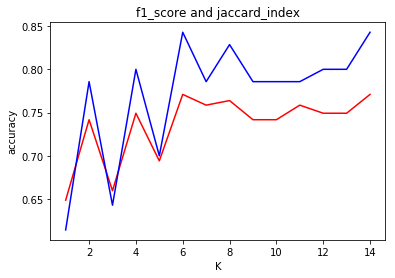

In [11]:
## for f1_score and jaccard_index k=13 gives the highest accuracies
ax = plt.plot(index,f1,'r',index,JI,'b')
plt.title('f1_score and jaccard_index')
plt.xlabel('K')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

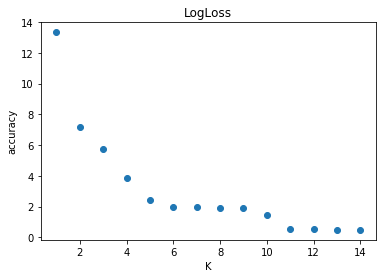

In [12]:
## for Logloss k=8 gives the higher accuracy
 
ax1 = plt.scatter(index,LL)
plt.title('LogLoss')
plt.xlabel('K')
plt.ylabel('accuracy')


In [13]:
print('Best values for KNN:', {'Logloss':0.4897 ,'f1_score': 0.7879,'jaccard_index':0.828})

Best values for KNN: {'Logloss': 0.4897, 'f1_score': 0.7879, 'jaccard_index': 0.828}


## Classification report

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_tar,y_test))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        70
           1       0.00      0.00      0.00         0

   micro avg       0.84      0.84      0.84        70
   macro avg       0.50      0.42      0.46        70
weighted avg       1.00      0.84      0.91        70



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Decision Tree Classifier


In [15]:

from sklearn.tree import DecisionTreeClassifier

f1_tree = []
JI_tree = []
LL_tree = []
index_tree = []


for e in range(1,50):
    fraud_tree = DecisionTreeClassifier(criterion="entropy", max_depth = e)
    fraud_tree.fit(x_train,y_train)
    y_tree_pred = fraud_tree.predict(x_test)
    y_prob_tree = fraud_tree.predict_proba(x_test)
    f1_tree.append(f1_score(y_test,y_tree_pred,average = 'weighted'))
    JI_tree.append(jaccard_similarity_score(y_test, y_tree_pred))
    LL_tree.append(log_loss(y_test, y_prob_tree[:,1]))
    index_tree.append(e)
    
    


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Performance

Text(0, 0.5, 'accuracy')

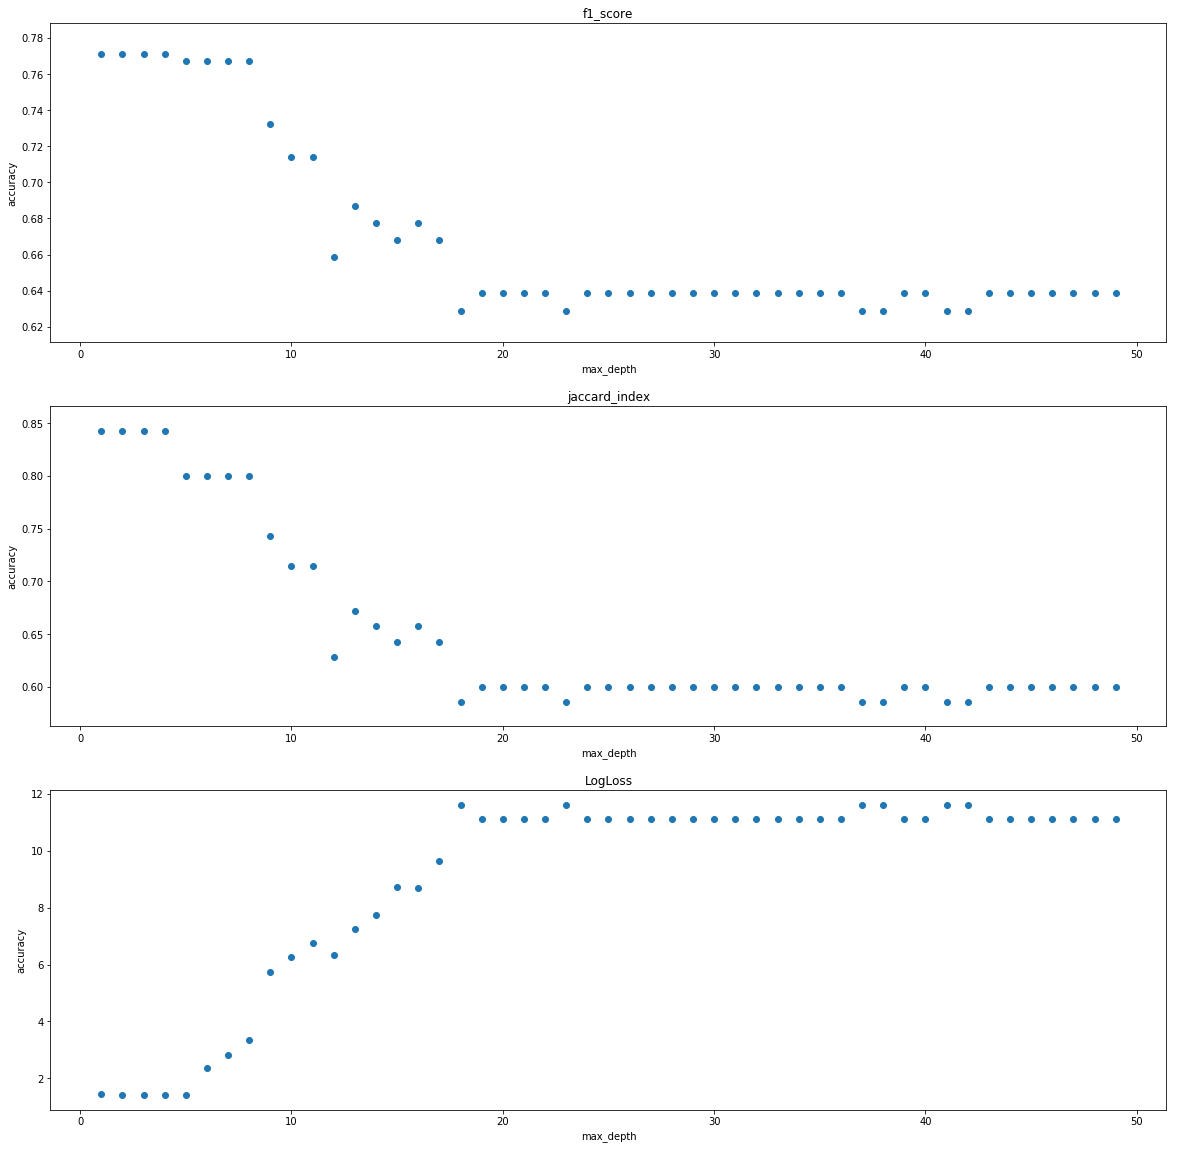

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

plt.subplot(311)
ax_tree = plt.scatter(index_tree,f1_tree)
plt.title('f1_score')
plt.xlabel('max_depth')
plt.ylabel('accuracy')

plt.subplot(312)
ax_tree2 = plt.scatter(index_tree,JI_tree)
plt.title('jaccard_index')
plt.xlabel('max_depth')
plt.ylabel('accuracy')

plt.subplot(313)
ax_tree3 = plt.scatter(index_tree,LL_tree)
plt.title('LogLoss')
plt.xlabel('max_depth')
plt.ylabel('accuracy')

In [17]:
# Best values obtained for LofLoss, f1_score and jaccard index by changing max_depth parameter.
print('Best values for Decision Tree:', {'Logloss':0.50 ,'f1_score': 0.66250,'jaccard_index':0.814})

Best values for Decision Tree: {'Logloss': 0.5, 'f1_score': 0.6625, 'jaccard_index': 0.814}


## Classification report

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_tree_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.80      0.75        51
           1       0.09      0.05      0.07        19

   micro avg       0.60      0.60      0.60        70
   macro avg       0.39      0.43      0.41        70
weighted avg       0.53      0.60      0.56        70



# Support Vector Machine

In [19]:
from sklearn import svm

SVM = svm.SVC(kernel='rbf')
SVM.fit(x_train, y_train) 
y_tar_SVM = SVM.predict(x_test)



f1_SVM = f1_score(y_test,y_tar_SVM,average = 'weighted')
JI_SVM = jaccard_similarity_score(y_test, y_tar_SVM)

print('Values for SVM:', {'f1_score': f1_SVM,'jaccard_index':JI_SVM})

Values for SVM: {'f1_score': 0.7709856035437431, 'jaccard_index': 0.8428571428571429}


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
from sklearn import svm

SVM2 = svm.SVC(kernel='linear')
SVM2.fit(x_train, y_train) 
y2_tar_SVM = SVM2.predict(x_test)



f1_SVM2 = f1_score(y_test,y2_tar_SVM,average = 'weighted')
JI_SVM2 = jaccard_similarity_score(y_test, y2_tar_SVM)

print('Values for SVM:', {'f1_score': f1_SVM2,'jaccard_index':JI_SVM2})

Values for SVM: {'f1_score': 0.7709856035437431, 'jaccard_index': 0.8428571428571429}


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
from sklearn import svm

SVM3 = svm.SVC(kernel='sigmoid')
SVM3.fit(x_train, y_train) 
y3_tar_SVM = SVM3.predict(x_test)



f1_SVM3 = f1_score(y_test,y3_tar_SVM,average = 'weighted')
JI_SVM3 = jaccard_similarity_score(y_test, y3_tar_SVM)

print("Sigmoid, linear and rbf gave the same results for accuracy")
print('Values for SVM:', {'f1_score': f1_SVM3,'jaccard_index':JI_SVM3})



Sigmoid, linear and rbf gave the same results for accuracy
Values for SVM: {'f1_score': 0.7709856035437431, 'jaccard_index': 0.8428571428571429}


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
f1_SVM_list = []
JI_SVM_list =[]
index_SVM_list = [] 
for s in np.arange(0.01, 0.1, 0.01):

    SVM5 = svm.SVC(C=s, kernel='rbf')
    SVM5.fit(x_train,y_train)
    y_SVM5 = SVM5.predict(x_test)
    f1_SVM_list.append(f1_score(y_test,y_SVM5,average = 'weighted'))
    JI_SVM_list.append(jaccard_similarity_score(y_test, y_SVM5))
    index_SVM_list.append(s)
   

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-sc

## Performance with differents parameters

Text(0, 0.5, 'Inverse of regulation strenght')

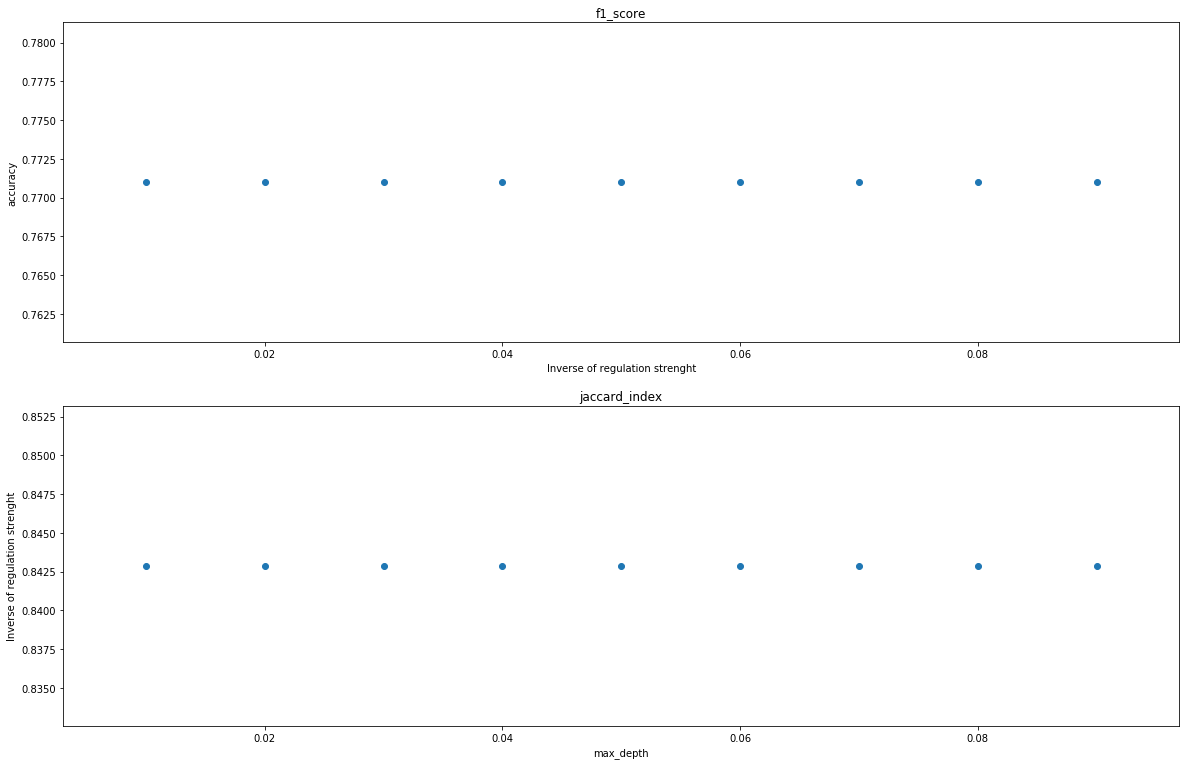

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

plt.subplot(311)
ax_tree = plt.scatter(index_SVM_list,f1_SVM_list)
plt.title('f1_score')
plt.xlabel('Inverse of regulation strenght')
plt.ylabel('accuracy')

plt.subplot(312)
ax_tree2 = plt.scatter(index_SVM_list,JI_SVM_list)
plt.title('jaccard_index')
plt.xlabel('max_depth')
plt.ylabel('Inverse of regulation strenght')



In [24]:
# Best values obtained for LofLoss, f1_score and jaccard index by changing max_depth C parameter (Inverse of regulation strenght).
print('Values for SVM:', {'f1_score': 0.69,'jaccard_index':0.78})

Values for SVM: {'f1_score': 0.69, 'jaccard_index': 0.78}


## Classification report

In [25]:
print(classification_report( y_SVM5,y_test))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        70
           1       0.00      0.00      0.00         0

   micro avg       0.84      0.84      0.84        70
   macro avg       0.50      0.42      0.46        70
weighted avg       1.00      0.84      0.91        70



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [26]:


from sklearn.linear_model import LogisticRegression

#liblinear works fine with small dataset
f1_LR = []
JI_LR =[]
LL_LR = []
index_LR = [] 
for a in np.arange(0.01, 0.1, 0.01):

    LR = LogisticRegression(C = a, solver = 'liblinear', max_iter = 100)
    LR.fit(x_train,y_train)
    y_LR = LR.predict(x_test)
    y_prob_LR = LR.predict_proba(x_test)
    f1_LR.append(f1_score(y_test,y_LR,average = 'weighted'))
    JI_LR.append(jaccard_similarity_score(y_test, y_LR))
    LL_LR.append(log_loss(y_test, y_prob_LR[:,1]))
    index_LR.append(a)
   
    

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Pyth

# Logistic Regression

Text(0, 0.5, 'accuracy')

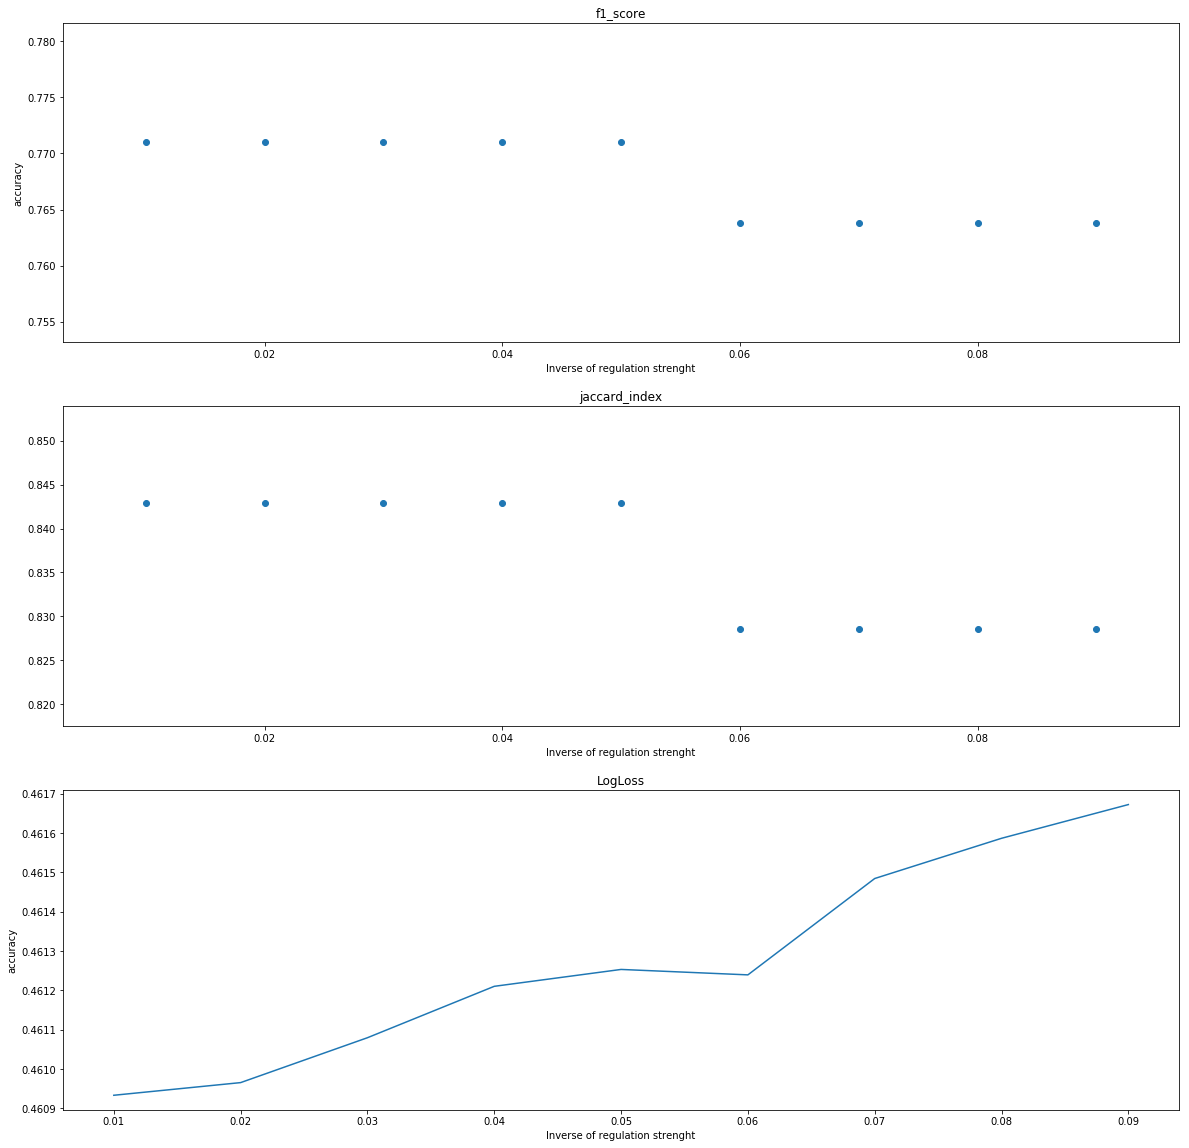

In [27]:
fig2, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

plt.subplot(311)
ax_tree = plt.scatter(index_LR,f1_LR)
plt.title('f1_score')
plt.xlabel('Inverse of regulation strenght')
plt.ylabel('accuracy')

plt.subplot(312)
ax_tree2 = plt.scatter(index_LR,JI_LR)
plt.title('jaccard_index')
plt.xlabel('Inverse of regulation strenght')
plt.ylabel('')

plt.subplot(313)
ax_tree3 = plt.plot(index_LR,LL_LR)
plt.title('LogLoss')
plt.xlabel('Inverse of regulation strenght')
plt.ylabel('accuracy')

In [28]:
#Best values obtained for LofLoss, f1_score and jaccard index by changing max_depth C parameter (Inverse of regulation strenght).

print('Values for Logistic Regression :', {'LogLoss':0.4910,'jaccard_index':0.80, 'f1_score':0.71})

Values for Logistic Regression : {'LogLoss': 0.491, 'jaccard_index': 0.8, 'f1_score': 0.71}


## Classification report

In [29]:
print(classification_report( y_LR,y_test))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91        69
           1       0.00      0.00      0.00         1

   micro avg       0.83      0.83      0.83        70
   macro avg       0.49      0.42      0.45        70
weighted avg       0.97      0.83      0.89        70

